# Проектная работа 3 Курс 2021/2022
# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Правка багов и аномалий (тестирование и исправление ошибок)
   4. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)
- *Бонусом можно обучить нейронную сеть, но это если будет желание)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

        Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
        Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r_i = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $


$ s_i = \gamma_{A}M_6 $


$ p_i = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $


$ q_i = \gamma_{J}M_2 $

## 2. План действий

### 2.1 Прямой ход работы
Мы генериеруем ключевые параметры А и В стратегий $v_i$ для двух стадий зоопланктона: молодых и взрослых особей. 

Далее мы с помощью А и В уже находим макропараметры $M_1,...,M_8$ и уже зная их мы можем с помощью имеющихся эмпирических данных посчитать значения функции фитнеса для всех стратегий. 

Следующим шагом нам предстоит воспользоваться сравнением пар получившихся значений фитнеса, чтобы разбить их на два базовых класс и уже эти классы мы предъявим нашему классификатору для непосредственного ранжирования с помощью метода опорных векторов или линейного дискриминанта Фишера 

### 2.2 Программный ход работы

Производим генерацию параметров стратегий, далее просчитываем макропараметры для каждой стратегии. Имея это можем найти значения известной функции фитнеса, а следовательно можем разделить на классы и уже непосредственно сформировать обучающую выборку, после ее формирования производим обучение моделей и получаем из этих моделей коэффициенты гиперплоскости, те в свою очередь являются коэффициентами функции фитнеса. На этом пока все, далее будет 2 Этап.

## 3. Реализация

### 3.1 Подготовка всех исходных данных

In [3]:
# Эмпирические данные 
alpha_j = 0.0016
alpha_a = 0.006
betta_j = 0.0000007
betta_a = 0.000000075
gamma_j = 0.00008
gamma_a = 0.004
delta_j = 0.000016
delta_a = 0.00006
sigma1 = 1
sigma2 = 1

D = 120
D0 = 70  

Nmax = 30

In [4]:
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров  
def rand_AB(Nmax):
   A_j, B_j, A_a, B_a = [], [], [], []
   for i in range(0, Nmax):
      Aj = round(rn.uniform(-D, 0), 4)
      Bj = round(rn.uniform(-min(Aj + D, -Aj), min(Aj + D, -Aj)), 4)
      A_j.append(Aj)
      B_j.append(Bj)

      Aa = round(rn.uniform(-D, 0), 4)
      Ba = round(rn.uniform(-min(Aa + D, -Aa), min(Aa + D, -Aa)), 4)
      A_a.append(Aa)
      B_a.append(Ba)
   data_strat = {'A_J': A_j, 'B_J': B_j, 'A_A': A_a, 'B_A': B_a}
   data = pd.DataFrame(data = data_strat)
   data.to_csv("data_strat.csv", index=False)
   return data
data_strat = rand_AB(Nmax)
data_strat

,A_J,B_J,A_A,B_A
0,-83.8769,9.6509,-14.2006,13.8654
1,-52.7433,42.4180,-106.0554,-6.6046
2,-103.6244,-15.5820,-65.0088,-16.3172
3,-99.8883,-0.9912,-119.5453,0.1609
4,-44.4901,-7.2361,-102.1411,4.7274
5,-100.1770,-5.9252,-39.2995,30.6718
6,-20.8078,15.1295,-17.0002,15.2544
7,-105.1134,2.5668,-7.0920,1.7454
8,-95.8643,13.9265,-116.2496,-2.6210
9,-41.0430,7.7345,-77.0996,19.0882


In [38]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров
def macroparams(data_strat):
   Aj = data_strat['A_J'].tolist()
   Bj = data_strat['B_J'].tolist()
   Aa = data_strat['A_A'].tolist()
   Ba = data_strat['B_A'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(1, 9):
      collect['M' + str(i)] = []
   for i in range(0, Nmax):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*(np.pi*Bj[i])**2)
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*(np.pi*Ba[i])**2)
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2)) 
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            collect_M['M' + str(i) + 'M' + str(j)].append(np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)]))
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         collect_MM['M' + str(i) + 'M' + str(j)].append(2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)]))

   M1, M2, M3 = macro_norm(collect, collect_M, collect_MM)
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i) + '_n'] = M1['M' + str(i) + '_n'][0]
   """ for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j) + '_n'] = M2['M' + str(i) + 'M' + str(j) + '_n'][0]
         else:
            continue """
   """ for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j) + '_n'] = M3['M' + str(i) + 'M' + str(j) + '_n'] """
   data.to_csv("data_macro.csv", index=False)
   return M3

# Нормализуем макропараметры для увеличения скорости классификатора
def macro_norm(collect, collect_M, collect_MM):
   M1 = defaultdict(list)
   M2 = defaultdict(list)
   M3 = defaultdict(list)

   for i in range(1, 9):
      M1['M' + str(i) + '_n'].append(np.array(collect['M' + str(i)])/max(np.abs(collect['M' + str(i)])))

   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            M2['M' + str(i) + 'M' + str(j) + '_n'].append(np.array(collect_M['M' + str(i) + 'M' + str(j)])/max(np.abs(collect_M['M' + str(i) + 'M' + str(j)])))
         else:
            continue   

   for i in range(2, 9):
      for j in range(1, i):
         M3['M' + str(i) + 'M' + str(j) + '_n'].append(np.array(collect_MM['M' + str(i) + 'M' + str(j)])/max(np.abs(collect_MM['M' + str(i) + 'M' + str(j)])))
   
   return M1, M2, M3

data = macroparams(data_strat)
data


defaultdict(list,
            {'M2M1_n': [array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                      -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                      -1., -1., -1., -1.]])],
             'M3M1_n': [array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                      -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                      -1., -1., -1., -1.]])],
             'M3M2_n': [array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                      1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])],
             'M4M1_n': [array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                      -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                      -1., -1., -1., -1.]])],
             'M4M2_n': [array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                  

In [4]:
import pandas as pd
# Считаем фитнесс
def fitness(Nmax):
   M1, M2, M3, M4, M5, M6, M7, M8 = macroparams(data_strat)
   J = []
   r, s, p, q = 0, 0, 0, 0
   for i in range(0, Nmax):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   return data

data_fit_macro = fitness(Nmax)
data_fit_macro

ValueError: too many values to unpack (expected 8)

In [ ]:
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
      
def data_class():
   data_fit_macro = fitness(Nmax)
   target = []
   for i in range(0, Nmax):
      for j in range(i + 1, Nmax):
         differ_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         target_ = classificator(differ_)
         target.append(differ_.append(pd.Series(target_, index =['target'])))
   data = pd.DataFrame(columns=['J', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'target'], data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data = data_class()
data


,J,M1,M2,M3,M4,M5,M6,M7,M8,target
0,-0.002859,-0.353118,0.468480,0.204584,-0.006686,-0.160537,0.252942,-0.227250,0.248963,-1.0
1,0.004708,0.107604,-0.013070,0.088957,0.234797,0.589417,-0.498178,-0.226634,0.072491,1.0
2,0.002381,-0.087884,-0.017185,0.345804,0.015025,0.447278,-0.251224,-0.077848,-0.104179,1.0
3,0.002258,-0.210098,0.398862,0.621528,0.058774,0.388719,-0.283737,-0.231980,-0.206123,1.0
4,0.000862,-0.499572,0.386305,0.339432,0.274338,0.153492,-0.240703,0.525547,-0.005032,1.0
...,...,...,...,...,...,...,...,...,...,...
430,0.003570,0.827626,-0.824161,-0.019983,-0.157297,0.068238,-0.202715,-0.055953,-0.169546,1.0
431,0.007650,0.813298,-0.874044,0.008578,-0.187308,0.656069,-0.700769,-0.098113,-0.365375,1.0
432,-0.001605,0.911741,-0.891896,-0.000816,-0.445397,-0.403435,0.382600,0.038546,0.356102,-1.0
433,0.002476,0.897413,-0.941779,0.027745,-0.475408,0.184397,-0.115454,-0.003613,0.160273,1.0


### 3.2 Реализация машинного обучения для SVM, LDA (от скуки написали 4 соседей (KNN))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data.iloc[:, 1:-1].values 
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получим коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]
SVC_coef

[1.207170495035574,
 -0.24986747679868732,
 -0.6261528633162332,
 -0.1497175960857664,
 3.0465326365845584,
 -4.965664109067583,
 -0.5039932296452191,
 -0.3346994827773643]

In [ ]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получим коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]
LDA_coef

[1.7660518323686611,
 -0.43459310093596504,
 -0.9178147340600905,
 -0.14905813758719116,
 3.2920708460857417,
 -9.765605611081622,
 -1.1572477966949055,
 0.903765475463256]

In [ ]:
# Реализуем KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
# Считаем разницу SVM и LDA (KNN)
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))
print('     KNN: ', accuracy_score(KNN_prediction, y_test), '  (Сделали от скуки)')

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Логарифмическая потеря:')
print('     SVM: ', SVM.mean())
print('     LDA: ', LDA.mean())



Точность классификатора:
     SVM:  0.9655172413793104
     LDA:  0.9425287356321839
     KNN:  0.8735632183908046   (Сделали от скуки)
Логарифмическая потеря:
     SVM:  0.9678160919540231
     LDA:  0.9586206896551724


### 3.3 Графики 

#### 3.3.1 Двумерные

In [ ]:
""" import matplotlib.pyplot as plt
X=data_class().loc[:,'M1':'M8']
y=data_class().loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
        plt.xlim(-1,)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" import matplotlib.pyplot as plt\nX=data_class().loc[:,'M1':'M8']\ny=data_class().loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(len(X.columns)):\n    for j in range(i + 1, len(X.columns)):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')\n        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')\n        plt.xlim(-1,)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "

#### 3.3.2 Трехмерные

In [ ]:
""" import matplotlib.pyplot as plt
X=data_class().loc[:,'M1':'M8']
y=data_class().loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        for k in range(len(X.columns)):
            if i == j or j == k or i == k:
                continue
            u, v = np.mgrid[-1:1:20j, -1:1:20j]
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.legend()
            plt.grid()
            plt.show() """

" import matplotlib.pyplot as plt\nX=data_class().loc[:,'M1':'M8']\ny=data_class().loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(len(X.columns)):\n    for j in range(len(X.columns)):\n        for k in range(len(X.columns)):\n            if i == j or j == k or i == k:\n                continue\n            u, v = np.mgrid[-1:1:20j, -1:1:20j]\n            fig = plt.figure(figsize=(10, 10))\n            ax = fig.add_subplot(111, projection='3d')\n            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')\n            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')\n            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')\n            ax.set_xlabel(X.columns[i])\n            ax.set_ylabel(X.columns[j])\n            ax.set_zlabel(X.columns[k])\n            plt.legend()\n            plt.grid()\n            plt.show() "

# Этап 2 | Построение фитнеса | Поиск оптимальной траектории | Проверка

In [ ]:
""" import random as rn
import numpy as np
from scipy.optimize import differential_evolution


def F(A):
   return (SVC_coef[0]*sigma1 - 2*SVC_coef[3]*(A + D0))/(2*(4*(np.pi**2)*SVC_coef[2] + SVC_coef[3]))

A = np.array(data_strat['A_J'].tolist())



abc = differential_evolution(F, bounds=(-D, 0))
abc

 """



" import random as rn\nimport numpy as np\nfrom scipy.optimize import differential_evolution\n\n\ndef F(A):\n   return (SVC_coef[0]*sigma1 - 2*SVC_coef[3]*(A + D0))/(2*(4*(np.pi**2)*SVC_coef[2] + SVC_coef[3]))\n\nA = np.array(data_strat['A_J'].tolist())\n\n\n\nabc = differential_evolution(F, bounds=(-D, 0))\nabc\n\n "

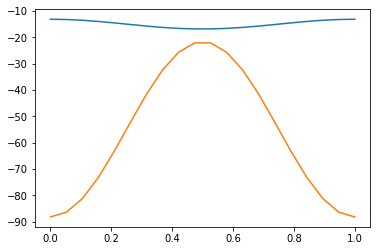

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 20)
xj = -14.9593 + 1.84831899*np.cos(2*np.pi*t)
xa = -54.9131 - 33.27123058*np.cos(2*np.pi*t)

plt.plot(t, xj)
plt.plot(t, xa)
